# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# pre-installed with TensorFlow
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
# store train set
X_train,          y_train           = mnist.train.images,      mnist.train.labels

# store validation set
X_validation,   y_validation = mnist.validation.images,   mnist.validation.labels

# store test set
X_test,           y_test             = mnist.test.images,       mnist.test.labels

# verify the number of images in each set which is match with labels in each set
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
# print out shape of first image so we can verify the the demension of the data
print("Image Shape: {}".format(X_train[0].shape))   
print()

# print out size of each set
print("Training Set:    {} samples".format(len(X_train)))
print("Validation Set:  {} samples".format(len(X_validation)))
print("Test Set:          {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:    55000 samples
Validation Set:  5000 samples
Test Set:          10000 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [2]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

9


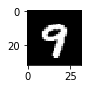

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#select random image from training set
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# matplotlib to visualize
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

# print out label
print(y_train[index])

## Preprocess Data

Shuffle the training data. -- it is important
      the ordering of the dat might have a huge effect on how well the network trends

You do not need to modify this section.

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

    More Epoch - the better our model will train but also the longer training will take
    
    Batch size - to tell TensorFlow, how many training images to run through the network at a time    
                     larger the batch size faster our model will train, 
                     but processor may have a memory limit on how large a bach it can run

You do not need to modify this section.

In [5]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    #  related to how we initialize our weights
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
         # this layer has 5x5 filter with an input depth of one and an output depth of six
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
        # initialize the bias
    conv1_b = tf.Variable(tf.zeros(6))
        # use the conv2D function to convolve the filter over the images
        # add bias 
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
        # the formula for convolutions tells us that the output height equals the input height minus the filter height plus one all divided by
        # the vertical stride.
        # input width  =  (32 - 5 +1 )/  1  = 28, output width = 28
        
                            # so convolutional output layer is 28x28x6
        
    # SOLUTION: Activation. 
    # Activated the Convolutional layer with ReLU activation function.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    # pool the output with 2x2 kernel with 2x2 stride
    # which gives us a pooling output of 14 x 14 x 6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
                       # second convolution output will give 5x5x16    

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
        # flatten output to vector.
        # length of the vector is 5x5x16 which is equals to 400
    fc0   = flatten(conv2)
    
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
        # fully connected layer with a width of 120 
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation. ReLU
    fc1    = tf.nn.relu(fc1)

    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
        # fully connected layer with a width of 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
        #  we attach a fully connected output layer with a width, equal to the number of classes in our label set. 
        # 10 set, one for each number. 
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    # initialized batch size to None, which allows the placeholder to later accept any size of any batch
    # we set the image dimensions to 32 by 32 by 1
y = tf.placeholder(tf.int32, (None))
    # y hold the labels which come through with sparse variables, which just means that they are integers
one_hot_y = tf.one_hot(y, 10)
    # one hot encoded
    # tf.one_hot function to one-hot encode the labels.

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [8]:
# hyperparameter
rate = 0.001
    # learning rate tells TensorFlow how quickly to update the networks's weights

logits = LeNet(x)
    # pass the input data to the LeNet function to calculate our logits
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    # softmax_cross_entropy_with_logits to compare those logits to the ground truth labes
    # and caculate the cross entropy
    # cross entropy is just a measure of how different the logits are from the ground truth training labels
loss_operation = tf.reduce_mean(cross_entropy)
    # tf.reduce_mean function averages the cross entropy from all of the training images.
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    # AdamOptimizer uses the Adam algorithm to minimize the loss function similarly to what stochastic gradient descent does.
    # Adam Algorithm is a little more sophisticated than stochastic gradient descent.
training_operation = optimizer.minimize(loss_operation)
    # we run the minimize function on the optimizer which uses backpropagation to update the network 
    # and minimie our training loss

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    # to measure whether a given prediction is correct by comparing the logit prediction to the one-hot encoded ground truth label
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #  calculate the models overall accuracy by averaging the individual prediction accuracies
saver = tf.train.Saver()
    
 # data set as input   
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    
    # batches the dataset.
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        
        # run through the evaluation pipeline
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        # averages the accuracy of the each batch to calculate the total accuracy of the model
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [10]:
# create the TensorFlow session 
with tf.Session() as sess:
    
    # initialize the vailable.
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    # train over whatever number of epoches has been set in the EPOCHS hyperparameter.
    for i in range(EPOCHS):
        
        # begining of each training, shuffle the data to ensure our training isn't biased by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        
        # break training data into batches and train the model on each batch.
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        # evaulate the model on our validation data.    
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.959

EPOCH 2 ...
Validation Accuracy = 0.975

EPOCH 3 ...
Validation Accuracy = 0.985

EPOCH 4 ...
Validation Accuracy = 0.986

EPOCH 5 ...
Validation Accuracy = 0.986

EPOCH 6 ...
Validation Accuracy = 0.989

EPOCH 7 ...
Validation Accuracy = 0.986

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.991

EPOCH 10 ...
Validation Accuracy = 0.987

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))